In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
features_scaled=sc.fit_transform(df[["Annual Income (k$)","Spending Score (1-100)"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

TypeError: 'str' object is not callable

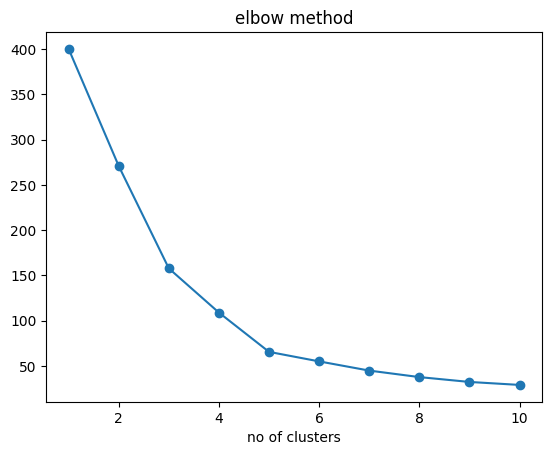

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  Kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  Kmeans.fit(features_scaled)
  wcss.append(Kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss)
plt.title("elbow method")
plt.xlabel("no of clusters")
plt.ylabel("wcss")



In [ ]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)
model=kmeans.fit_predict(features_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df["cluster"]=model
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


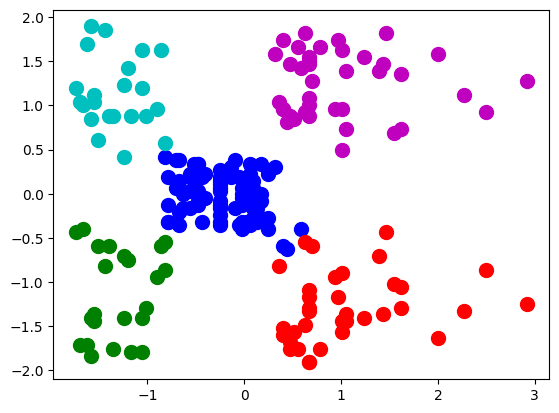

In [ ]:
color="brgcmyk"
xlabel="Annual Income (k$)"
ylabel="Spending Score (1-100)"
plt.scatter(features_scaled[model==0,0],features_scaled[model==0,1],s=100,c=color[0],label="cluster1")
plt.scatter(features_scaled[model==1,0],features_scaled[model==1,1],s=100,c=color[1],label="cluster2")
plt.scatter(features_scaled[model==2,0],features_scaled[model==2,1],s=100,c=color[2],label="cluster3")
plt.scatter(features_scaled[model==3,0],features_scaled[model==3,1],s=100,c=color[3],label="cluster4")
plt.scatter(features_scaled[model==4,0],features_scaled[model==4,1],s=100,c=color[4],label="cluster5")

In [ ]:
xlabel="Annual Income (k$)"
ylabel="Spending Score (1-100)"
x=df[[xlabel,ylabel]]

TypeError: 'str' object is not callable

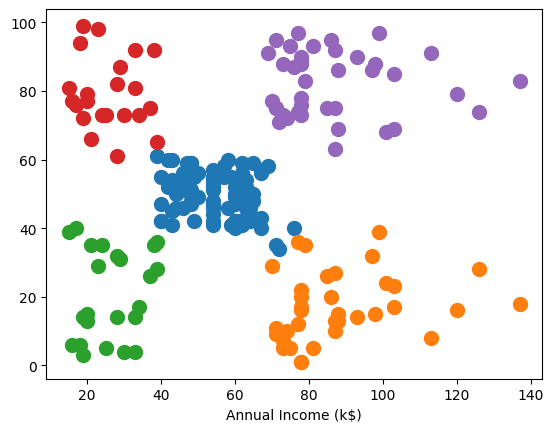

In [ ]:
for label in np.unique(kmeans.labels_):
  x_=x[label==kmeans.labels_]
  plt.scatter(x_[xlabel],x_[ylabel],s=100,label=label)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()